In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
raw_df = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\resources\65262-110-values.csv')

In [ ]:
raw_df = raw_df.sort_values(by=['timestamp'])

In [204]:
raw_df.dropna(inplace=True)

In [205]:
raw_df.head()

,timestamp,pgn,spn,decodedValue
0,46,0,897,1.0
1,46,0,898,6340.5
2,46,0,518,100.0
3,46,0,696,1.0
4,46,0,4207,2.0


In [206]:
#df_copy.drop("timestamp", axis=1, inplace=True)

In [207]:
#df_copy.value_counts("pgn")

In [208]:
#counts = df_copy["pgn"].value_counts()


In [209]:
#df_copy.groupby(["pgn", "spn"]).value_counts()

### Creating a dataset with relevant PGNs

In [210]:
values = [61443, 61444, 61441, 65247, 65266, 61450, 65248, 65215, 65263, 65213, 64817, 65253, 64777, 65262]

In [211]:
df_new = raw_df[raw_df['pgn'].isin(values)]

In [212]:
#df_new = df_new.sort_values(by=['timestamp'])
#df_new.drop("timestamp", axis=1, inplace=True)

In [213]:
df_new.to_csv('relevant_data.csv')

In [214]:
df = pd.read_csv('relevant_data.csv')

In [215]:
df["sensor"] = df['pgn'].astype(str) +"-"+ df["spn"].astype(str)

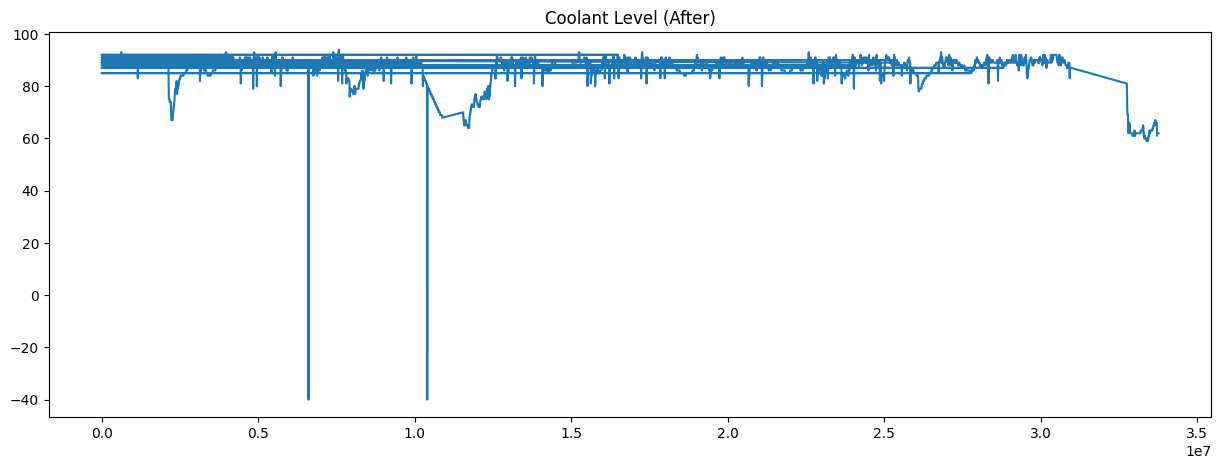

In [216]:
vals = df.loc[(df['sensor']=='65262-110'), 'decodedValue']
ts = df.loc[(df['sensor']=='65262-110'), 'timestamp']
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Level (After)')
plt.show()

In [217]:
df = df.sort_values(by=['timestamp'])

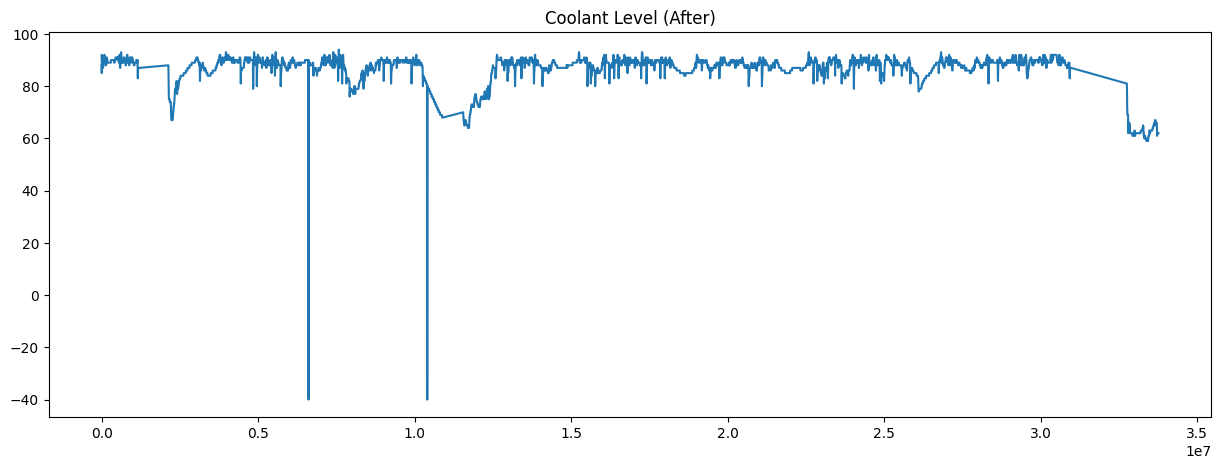

In [218]:
vals = df.loc[(df['sensor']=='65262-110'), 'decodedValue']
ts = df.loc[(df['sensor']=='65262-110'), 'timestamp']
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Level (After)')
plt.show()

In [219]:
cdf = df.copy()

In [220]:
df.head(10)

,Unnamed: 0,timestamp,pgn,spn,decodedValue,sensor
21164025,57555466,0,65266,185,22.509766,65266-185
14220891,39186820,0,61443,2970,1.000000,61443-2970
14220890,39186819,0,61443,5398,0.000000,61443-5398
14220889,39186818,0,61443,559,1.000000,61443-559
14220888,39186817,0,61443,2979,0.000000,61443-2979
14095752,38848846,0,65247,3240,1.000000,65247-3240
14095751,38848845,0,65247,3239,1.000000,65247-3239
14095750,38848844,0,65247,515,5125.000000,65247-515
14095749,38848843,0,65247,2978,0.000000,65247-2978
14095748,38848842,0,65247,514,6.000000,65247-514


In [221]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [222]:
df.head(10)

,timestamp,pgn,spn,decodedValue,sensor
21164025,0,65266,185,22.509766,65266-185
14220891,0,61443,2970,1.000000,61443-2970
14220890,0,61443,5398,0.000000,61443-5398
14220889,0,61443,559,1.000000,61443-559
14220888,0,61443,2979,0.000000,61443-2979
14095752,0,65247,3240,1.000000,65247-3240
14095751,0,65247,3239,1.000000,65247-3239
14095750,0,65247,515,5125.000000,65247-515
14095749,0,65247,2978,0.000000,65247-2978
14095748,0,65247,514,6.000000,65247-514


In [223]:
#print(df.loc[(df['sensor'] == '65262-110'), 'decodedValue'].describe())

Looking at only the engine cooling system

In [224]:
#sensors = ['61441-521', '61441-973', '61443-91', '61443-92', '61443-974', '61443-29', '61443-3357', '61443-5398', '61444-4154', '61444-512', '61444-513', '61444-190', '61444-2432', '61450-2659', '61450-132', '61450-5257', '64817-1550', '64817-1598', '65213-975', '65213-1639', '65247-514', '65247-515', '65247-2978', '65262-110', '65262-174', '65262-175', '65262-176', '65262-52', '65263-94', '65263-22', '65263-98', '65263-100', '65263-101', '65263-109', '65263-111', '65266-183', '65266-184', '65266-185', '65266-51', '65266-3673']
coolsys = ['64817-1598', '65262-110', '65263-111']

Creating a sub dataframe using only the cooling system

In [225]:
df = df[df['sensor'].isin(coolsys)]

In [226]:
df.shape

(92562, 5)

In [228]:
df.head()

,timestamp,pgn,spn,decodedValue,sensor
5130151,3,64817,1598,4096.0,64817-1598
7747659,4,65263,111,50.0,65263-111
26654665,7,65262,110,88.0,65262-110
10947076,42,65262,110,89.0,65262-110
32137298,56,65263,111,50.0,65263-111
32133139,62,65262,110,87.0,65262-110
4759484,88,65263,111,50.0,65263-111
30291342,368,65263,111,50.0,65263-111
19651104,456,64817,1598,4096.0,64817-1598
15595244,623,65263,111,50.0,65263-111


In [231]:
lsofdicts = []
for index,rows in df.iterrows():
    x = rows[4]
    y = rows[3]
    z = {'timestamp': rows[0],x: y}
    lsofdicts.append(z)
this_df = pd.DataFrame(lsofdicts)

In [232]:
#pd.concat([new_df, z], ignore_index=True)

In [233]:
this_df = this_df.sort_values(by=['timestamp'])

In [234]:
this_df.head()

,timestamp,64817-1598,65263-111,65262-110
0,3,4096.0,NaN,NaN
1,4,NaN,50.0,NaN
2,7,NaN,NaN,88.0
3,42,NaN,NaN,89.0
4,56,NaN,50.0,NaN
5,62,NaN,NaN,87.0
6,88,NaN,50.0,NaN
7,368,NaN,50.0,NaN
8,456,4096.0,NaN,NaN
9,623,NaN,50.0,NaN


In [235]:
this_df.fillna(method='ffill', inplace=True)
this_df.dropna(inplace=True)
this_df.head(10)

,timestamp,64817-1598,65263-111,65262-110
2,7,4096.0,50.0,88.0
3,42,4096.0,50.0,89.0
4,56,4096.0,50.0,89.0
5,62,4096.0,50.0,87.0
6,88,4096.0,50.0,87.0
7,368,4096.0,50.0,87.0
8,456,4096.0,50.0,87.0
9,623,4096.0,50.0,87.0
10,625,4096.0,50.0,89.0
11,631,4096.0,50.0,90.0


<Axes: >

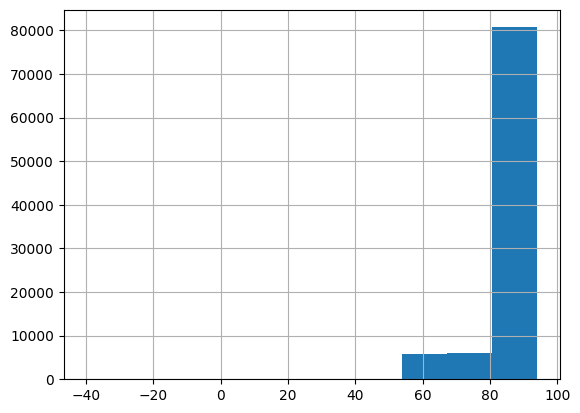

In [236]:
this_df['65262-110'].hist()

<Axes: >

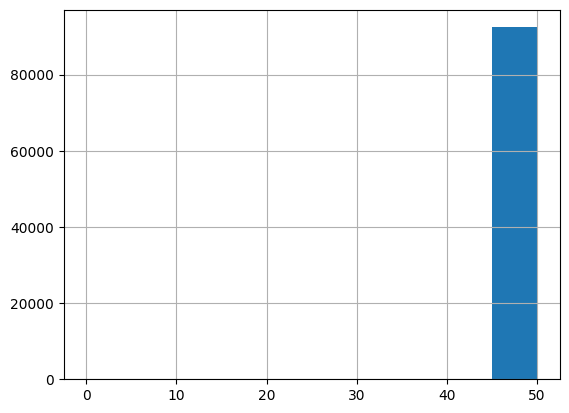

In [237]:
this_df['65263-111'].hist()

In [240]:
this_df.shape

(92560, 4)

In [241]:
this_df.to_csv('cooling_system.csv')

In [242]:
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

In [299]:
this_df.loc[(this_df['64817-1598']==0), '65262-110'].value_counts().sum() #Checking for how many values was the fan turned off

50

In [281]:
this_df.loc[(this_df['65262-110']<=90.0), '65262-110'].value_counts().sum()

84482

In [313]:
'''                                         #timestamps dictate that the fan turns off for around 2 seconds
counter = 0
couunt = 0
for index, row in this_df.iterrows():
    try:
        prevr = this_df.loc[index-4]
        next = this_df.loc[index+4]
    except:
        print("Bleh")
    if(row[3] == 90.0 and prevr[3] > 90.0):
        counter += 1
    if(row[1]==0):
        print(row[0]/60000)
        
print(counter)
print(couunt)
'''

Bleh
Bleh
Bleh
Bleh
25.49895
63.747933333333336
63.75051666666667
63.759
63.76721666666667
63.7773
139.06241666666668
139.06551666666667
139.08006666666665
139.08215
139.0968
139.09876666666668
156.76155
156.76451666666668
156.76646666666667
163.91165
163.91525
163.9171
163.92345
165.31156666666666
165.31526666666667
165.31718333333333
165.34003333333334
165.35661666666667
229.60985
229.618
236.52631666666667
236.5267
236.5351
236.53725
286.37471666666664
286.38785
286.3899166666667
294.74128333333334
294.747
294.75535
294.7569833333333
356.0395833333333
356.04203333333334
356.0441833333333
356.0508
356.05895
356.06708333333336
490.6025
490.6084
490.6167
490.61861666666664
538.8510166666666
589.6662
592.9494833333333
Bleh
Bleh
Bleh
Bleh
565
0


In [253]:
df.loc[(df['sensor']=='65262-110') & (df['decodedValue']==-40.0), 'timestamp']

6890896      6606818
11293344    10400058
Name: timestamp, dtype: int64

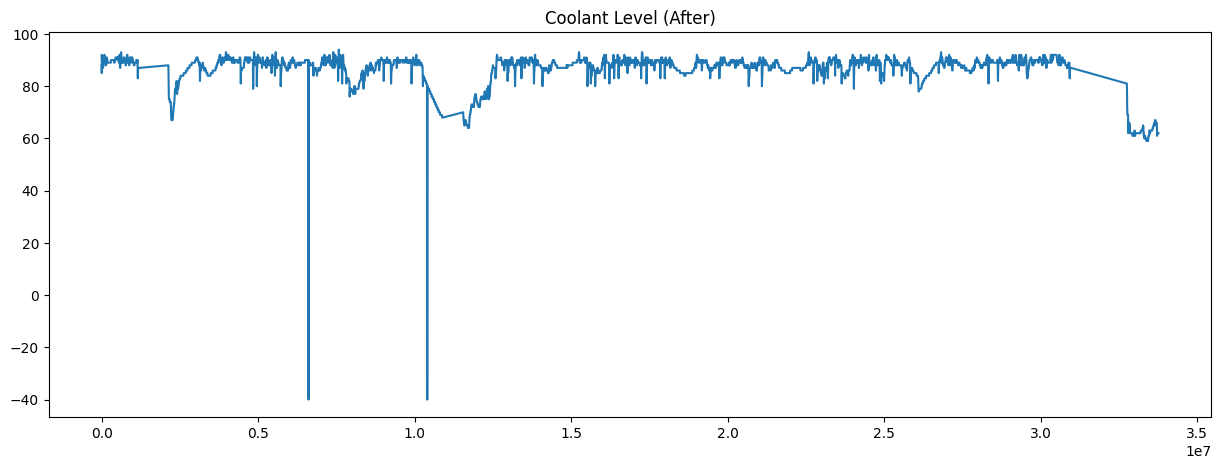

In [268]:
vals = df.loc[(df['sensor']=='65262-110'), 'decodedValue']
ts = df.loc[(df['sensor']=='65262-110'), 'timestamp']
#ts/=60
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Level (After)')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


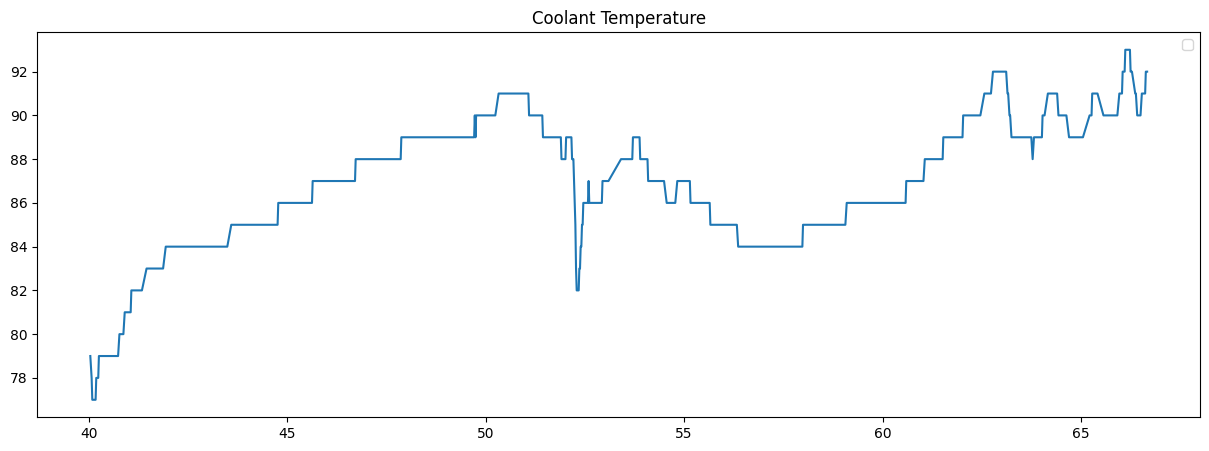

In [269]:
vals = df.loc[(df['sensor']=='65262-110') & (df['timestamp'] > 2400000) & (df['timestamp'] < 4000000), 'decodedValue']
ts = df.loc[(df['sensor']=='65262-110') & (df['timestamp'] > 2400000) & (df['timestamp'] < 4000000), 'timestamp']
ts /= 60000
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Temperature')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


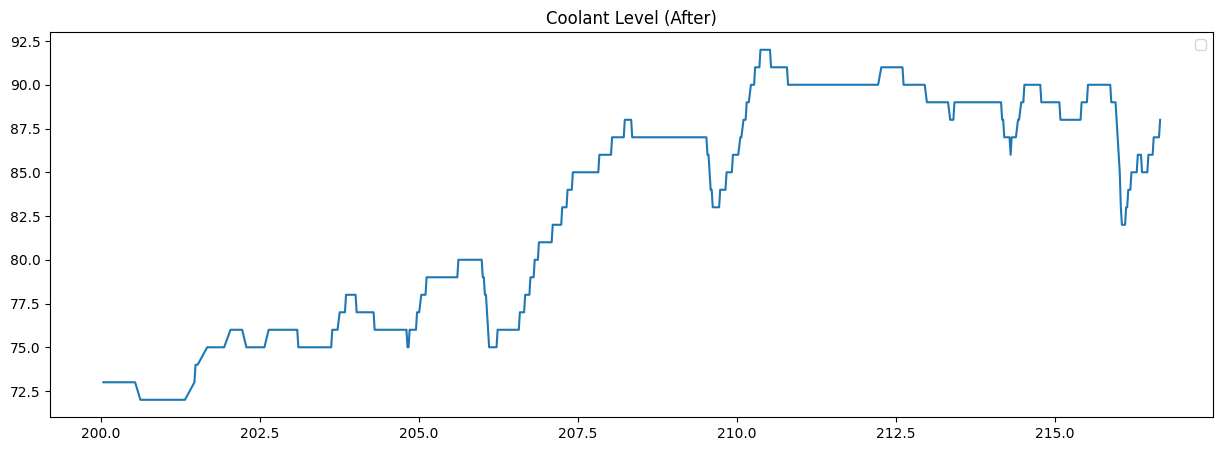

In [264]:
vals = df.loc[(df['sensor']=='65262-110') & (df['timestamp'] > 12000000) & (df['timestamp'] < 13000000), 'decodedValue']
ts = df.loc[(df['sensor']=='65262-110') & (df['timestamp'] > 12000000) & (df['timestamp'] < 13000000), 'timestamp']
ts /= 60000
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Level (After)')
plt.legend()
plt.show()

In [250]:
this_df['timestamp'].is_monotonic

C:\Users\virag\AppData\Local\Temp\ipykernel_19012\1468320.py:1: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  this_df['timestamp'].is_monotonic


True

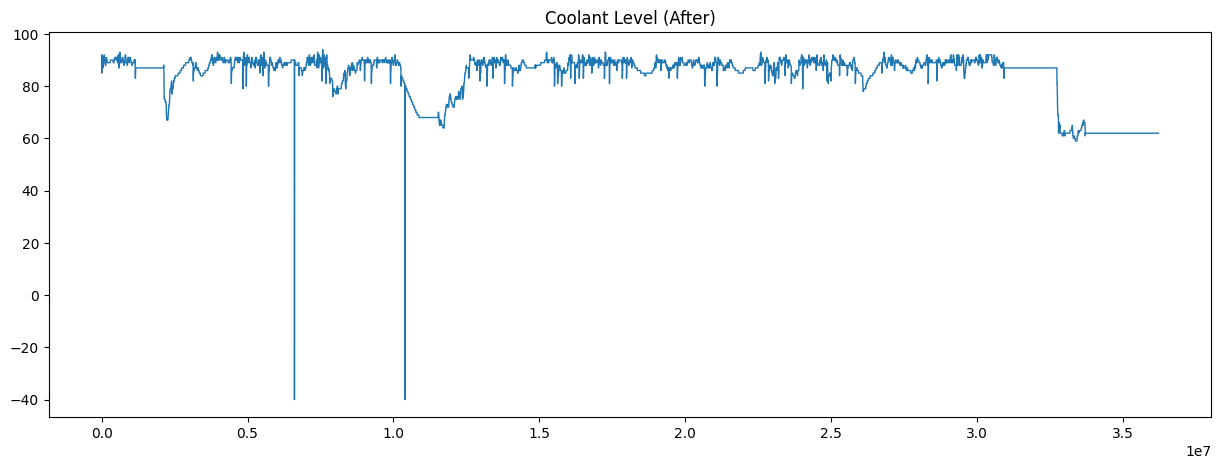

In [251]:
#Plotting the Coolant Level with faults
plt.figure(figsize=(15,5))
plt.plot(this_df['timestamp'], this_df['65262-110'], linewidth=1)
#plt.plot(moving_avg(this_df['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
#plt.xlim(0,len(this_df['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Level (After)')
#plt.legend()
plt.show()